# K nearest Neighbors Initial Exploration

An initial exploration to using K Nearest Neighbors on the teams "MLTable1". 

Used standard scalar transformation on this notebook.

In [1]:
#General imports
import pandas as pd
import boto3
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline 

## Load the Data

In [2]:
#load in the csvs
#TODO For Team: enter the credentails below to run
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the firms and scan df
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#unnamed seems to be a column brought in that we dont want. drop it. 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(1396691, 37)

In [5]:
# now get a sample of the df for quicker training
dftest = df.sample(frac=.2) #20% of df sampled 

## ML Prep

In [6]:
#seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']
#seperate data sets as labels and features
X_samp = dftest.drop('FIRE_DETECTED', axis=1)
y_samp = dftest['FIRE_DETECTED']

In [7]:
#train test splitting of data
#common syntax here is to use X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split(X_samp, y_samp, test_size=0.2, random_state=43)

In [8]:
#create our scalar to get optimized result
sc = StandardScaler() #runs the standard scalar with default settings. you can refine this, see docs
#transform the feature data by using the fit_transform 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test) 
X_train_samp = sc.fit_transform(X_train_samp) 
X_test_samp = sc.fit_transform(X_test_samp) 

## KNN ML Runs

In [9]:
def run_model(model):
    """
    On full df:
    function to run a model on partial df and get the results
    """
    model.fit(X_train, y_train) #fits the model using training data
    pred = model.predict(X_test) #predict the test data now
    
def run_model_samp(model):
    """
    On partial df:
    function to run a model on partial df and get the results
    """
    model.fit(X_train_samp, y_train_samp) #fits the model using training data
    pred = model.predict(X_test_samp) #predict the test data now

In [10]:
def run_and_visualize(model):
    """
    On full df:
    Function which runs the model on X_train and y_train and scores based on X_test, y_test 
    Displays results using yellowbricks classification report 
    """
    run_model(model)
    visualizer = ClassificationReport(
    model, 
    classes=['No_Fire', 'Fire'], 
    cmap="Reds", 
    support=True,
    size=(600, 360)
    )
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    print(str(model) + ':') #prints the model type
    visualizer.show() 
    
def run_and_visualize_samp(model):
    """
    On partial df:
    Function which runs the model on X_train and y_train and scores based on X_test, y_test 
    Displays results using yellowbricks classification report 
    """
    run_model_samp(model)
    visualizer = ClassificationReport(
    model, 
    classes=['No_Fire', 'Fire'], 
    cmap="Reds", 
    support=True,
    size=(600, 360)
    )
    visualizer.fit(X_train_samp, y_train_samp)  
    visualizer.score(X_test_samp, y_test_samp)
    print(str(model) + ':') #prints the model type
    visualizer.show() 

KNeighborsClassifier():


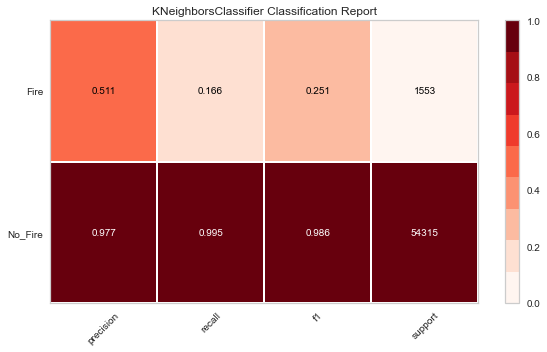

KNeighborsClassifier(weights='distance'):


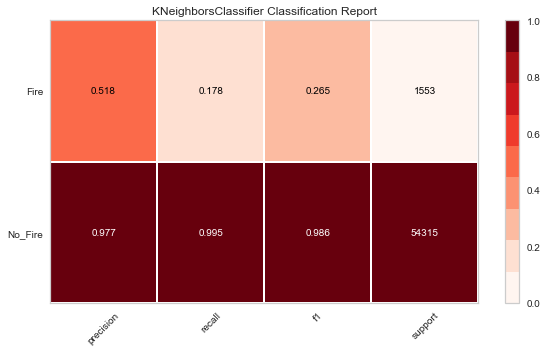

KNeighborsClassifier(n_neighbors=3):


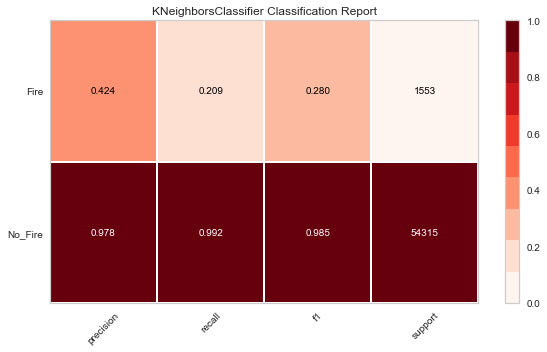

KNeighborsClassifier(n_neighbors=10):


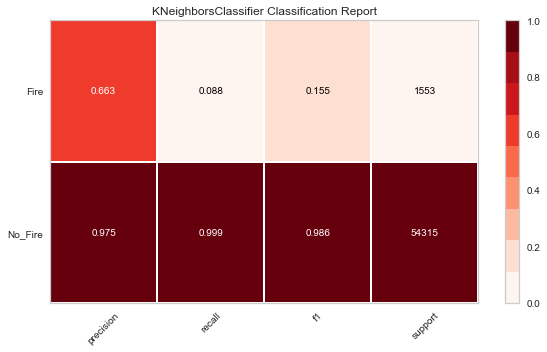

KNeighborsClassifier(algorithm='ball_tree'):


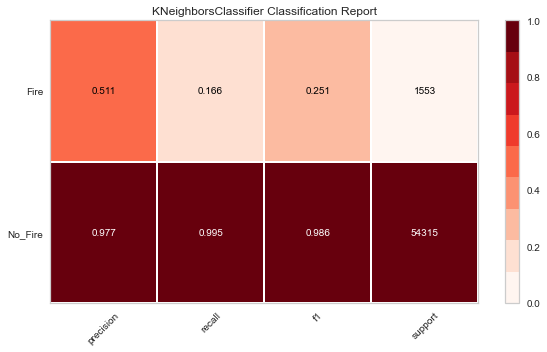

KNeighborsClassifier(algorithm='brute'):


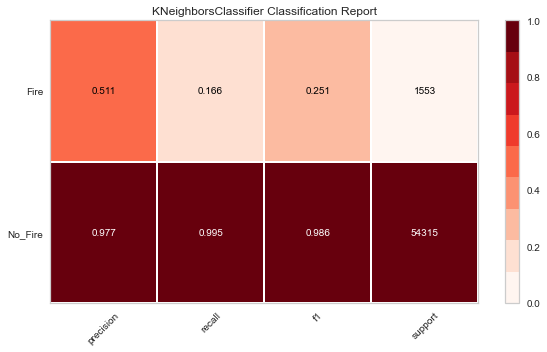

In [11]:
models = [
    KNeighborsClassifier(),
    KNeighborsClassifier(weights='distance'),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(algorithm='ball_tree'),
    KNeighborsClassifier(algorithm='brute')
]

for model in models:
    run_and_visualize_samp(model)

KNeighborsClassifier(n_neighbors=3, weights='distance'):


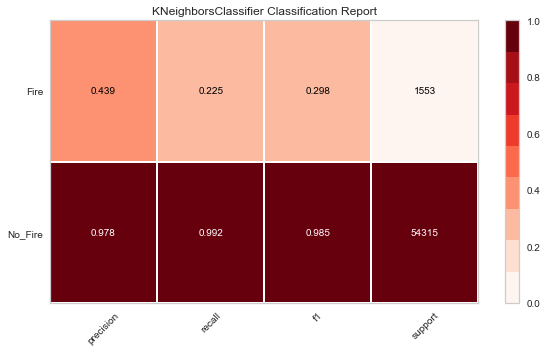

KNeighborsClassifier(algorithm='kd_tree'):


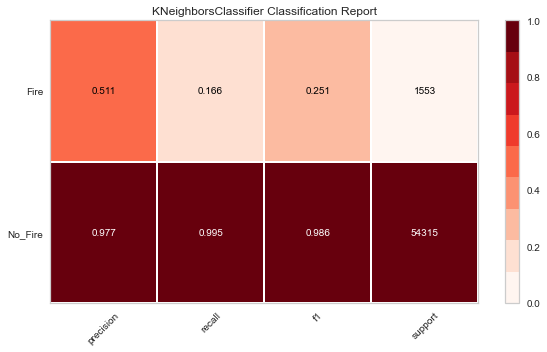

KNeighborsClassifier(leaf_size=60):


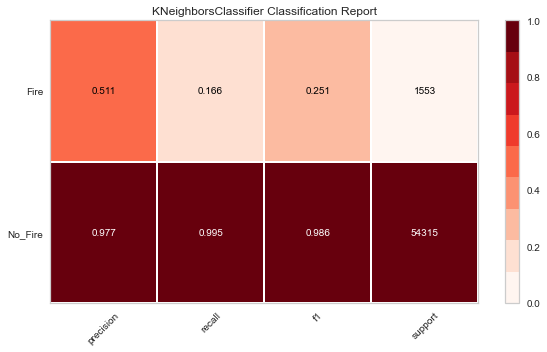

KNeighborsClassifier(leaf_size=15):


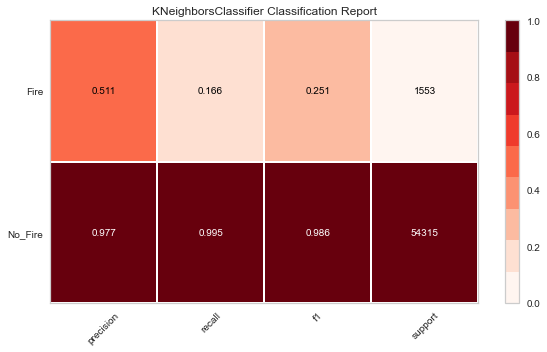

KNeighborsClassifier(p=1):


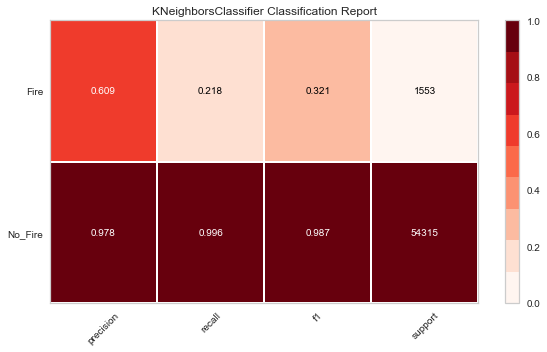

In [12]:
#try a few more
models2 = [
    KNeighborsClassifier(weights='distance', n_neighbors=3),
    KNeighborsClassifier(algorithm='kd_tree'),
    KNeighborsClassifier(leaf_size=60),
    KNeighborsClassifier(leaf_size=15),
    KNeighborsClassifier(p=1)
]

for model in models2:
    run_and_visualize_samp(model)